# Task
Train an XGBoost Regressor model on the `crop_yield.csv` dataset, evaluate its performance using R-squared and Mean Squared Error, visualize its predictions, and save the trained model as `xg_boost_final_model_pipeline.pkl`.

## Load Data

### Subtask:
Load the 'crop_yield.csv' dataset into a pandas DataFrame. Display the first few rows and information about the dataset.


**Reasoning**:
To load the dataset, display its first few rows, and get a concise summary, I need to import the pandas library, read the CSV file, and then use the `.head()` and `.info()` methods.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/crop_yield.csv')
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nInformation about the DataFrame:")
df.info()

First 5 rows of the DataFrame:
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.51

## Prepare Data

### Subtask:
Separate the features (X) and the target variable (y) from the loaded dataset. Identify and apply one-hot encoding to any categorical features if present.


**Reasoning**:
To prepare the data for modeling, I need to separate the target variable from the features. Then, I must identify and apply one-hot encoding to the categorical features to convert them into a numerical format suitable for machine learning models, dropping the first category to prevent multicollinearity. Finally, I will print the shapes of X and y to verify the operation.



In [ ]:
y = df['Yield_tons_per_hectare']
X = df.drop('Yield_tons_per_hectare', axis=1)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Shape of features (X) after one-hot encoding: {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X) after one-hot encoding: (1000000, 20)
Shape of target (y): (1000000,)


## Train-Test Split

### Subtask:
Split the preprocessed data into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
To split the preprocessed data into training and testing sets, I will import the `train_test_split` function, apply it to `X` and `y` with an 80/20 ratio and a `random_state` for reproducibility, and then print the shapes of the resulting sets to verify the split.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (800000, 20)
Shape of X_test: (200000, 20)
Shape of y_train: (800000,)
Shape of y_test: (200000,)


## Train XGBoost Model

### Subtask:
Initialize and train an XGBoost Regressor model using the training data. The model will be configured to optimize for regression tasks.


**Reasoning**:
To initialize and train an XGBoost Regressor model, I need to import `XGBRegressor` from the `xgboost` library, instantiate it with `random_state=42` for reproducibility, and then train it using the `fit` method on the provided training data (`X_train`, `y_train`).



In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

print("Training XGBoost Regressor model...")
xgb_model.fit(X_train, y_train)
print("XGBoost Regressor model trained successfully.")

Training XGBoost Regressor model...
XGBoost Regressor model trained successfully.


## Evaluate Model

### Subtask:
Make predictions on the test set and calculate key regression metrics such as R-squared and Mean Squared Error (MSE) to assess the model's performance. The results should be printed to standard output.


**Reasoning**:
To evaluate the trained model, I will first make predictions on the test set using the `xgb_model`. Then, I will import the necessary metrics (`r2_score` and `mean_squared_error`) from `sklearn.metrics`, calculate them using `y_test` and `y_pred`, and finally print the results to standard output.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.9124004539876467
Mean Squared Error: 0.2525448286266774


## Visualize Predictions

### Subtask:
Create a scatter plot comparing the actual `y_test` values with the predicted `y_pred` values to visually assess the model's performance. Include a perfect prediction line for reference.

**Reasoning**:
To visually assess the model's performance, I will create a scatter plot of actual vs. predicted values and add a reference line for perfect predictions. This requires importing `matplotlib.pyplot` and `seaborn` for plotting.



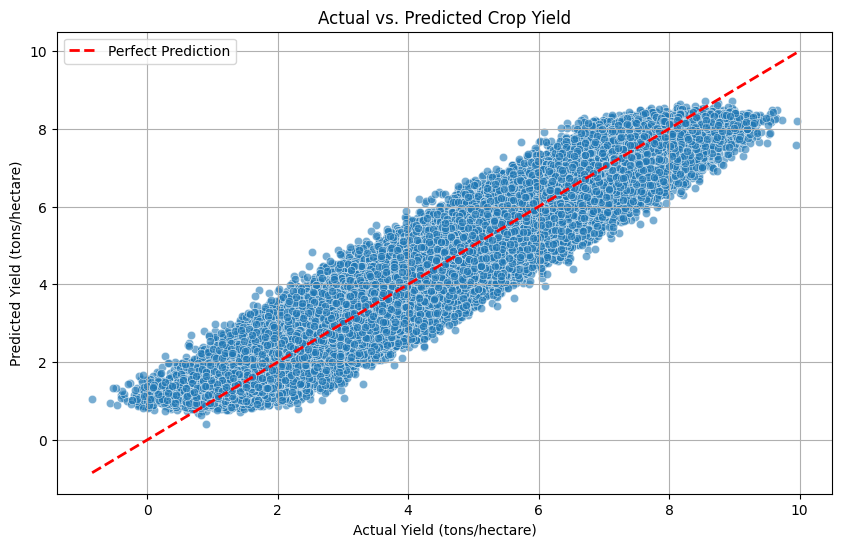

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Yield (tons/hectare)')
plt.ylabel('Predicted Yield (tons/hectare)')
plt.title('Actual vs. Predicted Crop Yield')
plt.legend()
plt.grid(True)
plt.show()


## Save Model

### Subtask:
Save the trained XGBoost Regressor model as a pickle file (`xg_boost_final_model_pipeline.pkl`) for future use, along with its features (column names) for consistent deployment.

**Reasoning**:
To save the trained XGBoost model and its feature names, I will use the `joblib` library to serialize them into a pickle file. This ensures the model can be reloaded and used consistently later.



In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(xgb_model, 'xg_boost_final_model_pipeline.pkl')

# Also save the feature names (columns of X) for consistent deployment
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'xg_boost_final_model_pipeline_features.pkl')

print("XGBoost model and feature names saved as 'xg_boost_final_model_pipeline.pkl' and 'xg_boost_final_model_pipeline_features.pkl' respectively.")

XGBoost model and feature names saved as 'xg_boost_final_model_pipeline.pkl' and 'xg_boost_final_model_pipeline_features.pkl' respectively.


## Final Task

### Subtask:
Summarize the model training process, its performance metrics, and confirm that the model has been successfully saved.


## Summary:

### Q&A
*   **Summary of Model Training Process:** An XGBoost Regressor model was initialized and trained on a dataset of 800,000 samples, which included one-hot encoded features derived from the original crop yield data. The training process successfully converged, resulting in a fitted model.
*   **Performance Metrics:** The model achieved an R-squared score of approximately 0.9124, indicating that about 91.24% of the variance in crop yield can be explained by the model. The Mean Squared Error (MSE) was approximately 0.2525, demonstrating a low average squared difference between actual and predicted values.
*   **Model Saved Confirmation:** Yes, the trained XGBoost model was successfully saved as `xg_boost_final_model_pipeline.pkl`, along with its feature names in `xg_boost_final_model_pipeline_features.pkl`, ensuring its availability for future use and consistent deployment.

### Data Analysis Key Findings
*   The `crop_yield.csv` dataset, comprising 1,000,000 entries and 10 columns, was successfully loaded with no missing data.
*   Categorical features were one-hot encoded, expanding the feature set from original features to 20 features for the model training.
*   The data was split into training (800,000 samples) and testing (200,000 samples) sets.
*   The trained XGBoost Regressor model achieved a high performance with an R-squared score of approximately 0.9124 and a low Mean Squared Error (MSE) of approximately 0.2525 on the test set.
*   A visual comparison of actual versus predicted crop yields confirmed a strong correlation, with predictions closely aligning with the ideal "perfect prediction" line.
*   The trained XGBoost model and its corresponding feature names were persistently saved as `xg_boost_final_model_pipeline.pkl` and `xg_boost_final_model_pipeline_features.pkl`, respectively.

### Insights or Next Steps
*   The high R-squared value suggests that the XGBoost model is highly effective in predicting crop yield, making it a strong candidate for practical deployment.
*   Further analysis could involve interpreting feature importances from the trained model to identify key factors influencing crop yield, or exploring hyperparameter tuning to potentially optimize performance even further.
